<a href="https://colab.research.google.com/github/javmohir/Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv", index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Scikit-learn yordamida LR
Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.

Avvalo ma'lumotlarni train va testga bo'lib olamiz.

Machine Learning. Linear Regression

Ustunlar ta'rifi

- location - sotilayotgan uy manzili
- district - uy joylashgan tuman
- rooms - xonalar soni
- size - uy maydoni (kv.m)
- level - uy

In [ ]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [ ]:
housing = df[df['district']=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
housing.shape

(1616, 6)

Bizda ma'lumotlar kam, shuning uchun 10% test uchun olamiz

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


θ
0
​
  va
�
1
θ
1
​
  qiymatlari yordamida to'g'ri chiziq chizamiz

Text(0, 0.5, 'price')

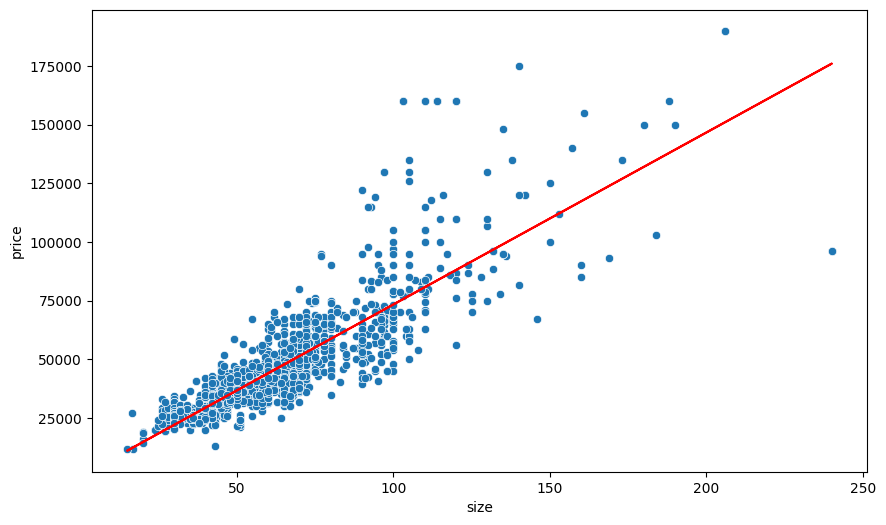

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel('size')
plt.ylabel('price')


Modelni baholaymiz

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
y_predict = LR_model.predict(x_test)
y_predict

array([[39676.35230934],
       [30883.01144764],
       [26486.34101679],
       [44073.02274019],
       [35279.68187849],
       [49935.24998132],
       [27951.89782708],
       [47736.9147659 ],
       [38210.79549906],
       [32348.56825793],
       [22822.44899109],
       [35279.68187849],
       [49935.24998132],
       [60194.1476533 ],
       [35279.68187849],
       [71185.82373042],
       [26486.34101679],
       [36745.23868877],
       [36745.23868877],
       [55797.47722245],
       [19891.33537052],
       [52866.36360189],
       [41141.90911962],
       [88039.72704868],
       [55064.69881731],
       [80711.94299726],
       [23555.22739623],
       [32348.56825793],
       [41141.90911962],
       [73384.15894585],
       [36745.23868877],
       [43266.96649453],
       [30883.01144764],
       [39676.35230934],
       [69720.26692014],
       [30883.01144764],
       [36012.46028363],
       [47736.9147659 ],
       [42607.46592991],
       [47736.9147659 ],


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,  y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f'{MAE=}')
print(f'{RMSE=}')

MAE=7269.709648262382
RMSE=12734.803748258666
